## Read image and video

In [2]:
import cv2 as cv

img = cv.imread(r'Resources\Photos\cat_large.jpg')

# Display image in new window
cv.imshow('Cat', img)

## wait specificy delay
cv.waitKey(0)


-1

In [3]:
## Reading videos
# if using 0 it capture the webcam
# if giving path it capture video
# Reading Videos
capture = cv.VideoCapture('Resources/Videos/dog.mp4')

while True:
    isTrue, frame = capture.read()
    
    cv.imshow('Video', frame)

    if cv.waitKey(20) & 0xFF==ord('d'):
        break

capture.release()
cv.destroyAllWindows()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-i1s8y2i1\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


## Resizing and Resclaing Frames

In [1]:
import cv2 as cv

def rescaleFrame(frame, scale=0.75):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)

    dimensions = (width, height)

    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)


capture = cv.VideoCapture('Resources/Videos/dog.mp4')

while True:
    isTrue, frame = capture.read()
    
    frame_resized = rescaleFrame(frame, scale = .2)
    
    cv.imshow('Video', frame)
    cv.imshow('Video Resized', frame_resized)

    if cv.waitKey(20) & 0xFF==ord('d'):
        break

capture.release()
cv.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [1]:
import cv2 as cv

img = cv.imread(r'Resources\Photos\cat_large.jpg')

# Display image in new window
cv.imshow('Cat', img)


def rescaleFrame(frame, scale=0.75):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)

    dimensions = (width, height)

    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)

# Display image in new window
resized_image = rescaleFrame(img)
cv.imshow('Image', resized_image)

## wait specificy delay
cv.waitKey(0)

-1

## Draw and write on images

In [14]:

import cv2 as cv
import numpy as np

img = cv.imread(r'Resources\Photos\cat.jpg')
 
blank = np.zeros((500,500, 3), dtype='uint8')

# 1. Paint the image a certain colour
#blank[:] = 0,0,255
#cv.imshow('Green', blank)

## Spefici areas
blank[200:300, 300:400] = 0,0,255
cv.imshow('Green', blank)

# 2. Draw a Rectangle
cv.rectangle(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), (0,255,0), thickness=-1)
cv.imshow('Rectangle', blank)

## 3. Draw A circle
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (0,0,255), thickness=-1)
cv.imshow('Circle', blank)

# 4. Draw a line
cv.line(blank, (100,250), (300,400), (255,255,255), thickness=3)
cv.imshow('Line', blank)

# 5. Write text
cv.putText(blank, 'Hello, my name is Jason!!!', (0,225), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0), 2)
cv.imshow('Text', blank)
cv.waitKey(0)

-1

## Essential Functions

In [34]:
import cv2 as cv
import numpy as np

img = cv.imread(r'Resources\Photos\cat.jpg')
cv.imshow('Img', img)

## Gray scale the image
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#cv.imshow('Gray', gray)

## Blur the image
blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)
#cv.imshow('Blur', blur)

## Edge cascade
canny = cv.Canny(blur, 125, 175)
#cv.imshow('canny edge', canny)

## Dilating the image
dilated = cv.dilate(canny, (3,3), iterations = 3)
cv.imshow('dilated', dilated)

## Eroding
eroded = cv.erode(dilated, (3,3), iterations = 3)
cv.imshow('Erode', eroded)

## Resize and crop image
resized = cv.resize(img, (500,500), interpolation = cv.INTER_CUBIC)
cv.imshow('resized', resized)

## Croping
cropped = img[50:200, 200:400]
cv.imshow('cropped', cropped)

cv.waitKey(0)

-1

## Image transformation

In [40]:
#pylint:disable=no-member

import cv2 as cv
import numpy as np

img = cv.imread(r'Resources\Photos\park.jpg')
cv.imshow('Park', img)

# Translation
def translate(img, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)

# -x --> Left
# -y --> Up
# x --> Right
# y --> Down

translated = translate(img, -100, 100)
cv.imshow('Translated', translated)

# Rotation
def rotate(img, angle, rotPoint=None):
    (height,width) = img.shape[:2]

    #rotating around center
    if rotPoint is None:
        rotPoint = (width//2,height//2)
    
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width,height)

    return cv.warpAffine(img, rotMat, dimensions)

rotated = rotate(img, -45)
cv.imshow('Rotated', rotated)

rotated_rotated = rotate(img, -90)
cv.imshow('Rotated Rotated', rotated_rotated)

# Resizing
resized = cv.resize(img, (500,500), interpolation=cv.INTER_CUBIC)
cv.imshow('Resized', resized)

# Flipping
flip = cv.flip(img, -1)
cv.imshow('Flip', flip)

# Cropping
cropped = img[200:400, 300:400]
cv.imshow('Cropped', cropped)

cv.waitKey(0)

-1

## Contour detection

In [4]:
# Broder 

import cv2 as cv
import numpy as np

img = cv.imread(r'Resources\Photos\cats.jpg')
cv.imshow('img', img)

blank = np.zeros(img.shape, dtype='uint8')
cv.imshow('Blank', blank)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
cv.imshow('Blur', blur)

canny = cv.Canny(blur, 125, 175)
cv.imshow('Canny Edges', canny)

#ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
#cv.imshow('Thresh', thresh)

contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contour(s) found!')

cv.drawContours(blank, contours, -1, (0,0,255), 1)
cv.imshow('Contours Drawn', blank)

cv.waitKey(0)

380 contour(s) found!


-1

## Color Spaces


In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# plt.imshow(img)
# plt.show()

img = cv.imread(r'Resources\Photos\park.jpg')
cv.imshow('img', img)

# BGR to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('gray', gray)

# BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow('hsv', hsv)

# BGR to LAB
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow('lab', lab)

# BGR to RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('RGB', rgb)

# HSV to BGR
lab_bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)
cv.imshow('LAB --> BGR', lab_bgr)


cv.waitKey(0)

-1

## Color Channel

In [8]:
import cv2 as cv
import numpy as np

img = cv.imread(r'Resources\Photos\park.jpg')
cv.imshow('img', img)

blank = np.zeros(img.shape[:2], dtype='uint8')

b,g,r = cv.split(img)

blue = cv.merge([b,blank,blank])
green = cv.merge([blank,g,blank])
red = cv.merge([blank,blank,r])


cv.imshow('blue',blue)
cv.imshow('green',green)
cv.imshow('red',red)

print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

merged = cv.merge([b,g,r])
cv.imshow('Merged Image', merged)


cv.waitKey(0)


(427, 640, 3)
(427, 640)
(427, 640)
(427, 640)


-1

## Smooth and blur

In [10]:
import cv2 as cv
import numpy as np

img = cv.imread(r'Resources\Photos\cats.jpg')
cv.imshow('img', img)

# Averaging
average = cv.blur(img, (3,3))
cv.imshow('Average Blur', average)

# Gaussian Blur
gauss = cv.GaussianBlur(img, (3,3), 0)
cv.imshow('Gaussian Blur', gauss)

# Median Blur
median = cv.medianBlur(img, 3)
cv.imshow('Median Blur', median)

# Bilateral
bilateral = cv.bilateralFilter(img, 10, 35, 25)
cv.imshow('Bilateral', bilateral)

cv.waitKey(0)

-1

## Bitwise operator

In [11]:

import cv2 as cv
import numpy as np

blank = np.zeros((400,400), dtype='uint8')

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)

cv.imshow('Rectangle', rectangle)
cv.imshow('Circle', circle)

# bitwise AND --> intersecting regions
bitwise_and = cv.bitwise_and(rectangle, circle)
cv.imshow('Bitwise AND', bitwise_and)

# bitwise OR --> non-intersecting and intersecting regions
bitwise_or = cv.bitwise_or(rectangle, circle)
cv.imshow('Bitwise OR', bitwise_or)

# bitwise XOR --> non-intersecting regions
bitwise_xor = cv.bitwise_xor(rectangle, circle)
cv.imshow('Bitwise XOR', bitwise_xor)

# bitwise NOT
bitwise_not = cv.bitwise_not(circle)
cv.imshow('Circle NOT', bitwise_not)

cv.waitKey(0)

-1

## Masking


In [17]:
import cv2 as cv
import numpy as np

img = cv.imread(r'Resources\Photos\cats 2.jpg')
cv.imshow('img', img)

blank = np.zeros(img.shape[:2], dtype='uint8')
cv.imshow('Blank Image', blank)

mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
cv.imshow('Mask', mask)

circle = cv.circle(blank.copy(), (img.shape[1]//2 + 45,img.shape[0]//2), 100, 255, -1)

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)

weird_shape = cv.bitwise_and(circle,rectangle)
cv.imshow('Weird Shape', weird_shape)

masked = cv.bitwise_and(img,img,mask=weird_shape)
cv.imshow('Weird Shaped Masked Image', masked)


masked = cv.bitwise_and(img, img, mask = mask)
cv.imshow('Masked image', masked)



cv.waitKey(0)

-1

## Histogram Computation


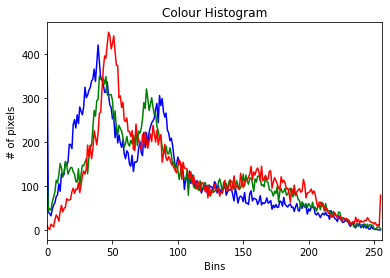

-1

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread(r'Resources\Photos\cats.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape[:2], dtype='uint8')

# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow('Gray', gray)

mask = cv.circle(blank, (img.shape[1]//2,img.shape[0]//2), 100, 255, -1)

masked = cv.bitwise_and(img,img,mask=mask)
cv.imshow('Mask', masked)

# GRayscale histogram
# gray_hist = cv.calcHist([gray], [0], mask, [256], [0,256] )

# plt.figure()
# plt.title('Grayscale Histogram')
# plt.xlabel('Bins')
# plt.ylabel('# of pixels')
# plt.plot(gray_hist)
# plt.xlim([0,256])
# plt.show()

# Colour Histogram

plt.figure()
plt.title('Colour Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
colors = ('b', 'g', 'r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img], [i], mask, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

plt.show()

cv.waitKey(0)

## Thresholding/Binarizing Images

In [28]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread(r'Resources\Photos\cats.jpg')
cv.imshow('Cats', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('gray', gray)

# Simple thresholding
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)
cv.imshow('Simple thresholding', thresh)

threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV)
cv.imshow('Simple thresholding', thresh_inv)

## Adaptive thresholding
adpaive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 11, 3)
cv.imshow('adaptive thresholding', adpaive_thresh)

cv.waitKey(0)

-1

## Edge Detection

In [29]:
import cv2 as cv
import numpy as np

img = cv.imread(r'Resources\Photos\park.jpg')
cv.imshow('Park', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

# Laplacian
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow('Laplacian', lap)

# Sobel 
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_or(sobelx, sobely)

cv.imshow('Sobel X', sobelx)
cv.imshow('Sobel Y', sobely)
cv.imshow('Combined Sobel', combined_sobel)

canny = cv.Canny(gray, 150, 175)
cv.imshow('Canny', canny)
cv.waitKey(0)

-1